In [4]:
import numpy as np

#from load_data_mongoloids import load_data_mongoloids
#from mongoloids_config import config

#from load_data_mongoloids import load_data_mongoloids_horvath_cpgs
#from mongoloids_cpg_horvath_config import config

#from load_data_mongoloids import load_data_mongoloids_hannum_cpgs
#from mongoloids_cpg_hannum_config import config

#from load_data_cancer import load_data_cancer
#from cancer_config import config

#from configurations.load_data_down_GSE63347 import load_data_down_GSE63347
#from configurations.config_down_GSE63347 import config

from configurations.load_data_down_GSE63347 import load_data_down_GSE63347_cpg_horvath
from configurations.config_down_GSE63347_cpg_horvath import config

from transform_data import *
import time
import matplotlib
import matplotlib.pyplot as plt
import textwrap
import scipy.stats as stats
import pandas as pd

from configuration import param
import matplotlib.pylab as pylab
import seaborn
seaborn.set_style('darkgrid', {'legend.frameon':True})
fontsize = 70
params = {'legend.fontsize': fontsize,
  'figure.figsize': (18, 15),
 'axes.labelsize': fontsize,
 'axes.titlesize':fontsize,
 'xtick.labelsize':fontsize,
 'ytick.labelsize':fontsize}
pylab.rcParams.update(params)

plt.style.use('ggplot')
%matplotlib inline

print config.params["kde_mask"].value

normal_mask


In [5]:
#X, y, _, genes_names = load_data_mongoloids()
X, y, _, genes_names = load_data_down_GSE63347_cpg_horvath()
#X, y, _, genes_names = load_data_cancer()
#X, y, _, cpgs_names = load_data_mongoloids_hannum_cpgs()
#X, y, _, cpgs_names = load_data_mongoloids_horvath_cpgs()


Data loaded:  0.0518656040322
float32 (353L, 71L)
(71L, 353L) 353


In [2]:
def concatenate_new_features():    
    config.params["id_part"].manual_ticks = True
    config.params["thr_p"].manual_ticks = True
    config.params["id_sample"].manual_ticks = True

    config.upd_ticks()
    degrees = np.zeros((config.params["thr_p"].num_ticks, config.params["id_sample"].num_ticks, config.params["num_genes"].value), dtype=np.int32)
    parenclitics = np.zeros((config.params["thr_p"].num_ticks, config.params["id_sample"].num_ticks, parenclitic_num_features()), 
                            dtype=np.float32)

    for i, thr_p in enumerate(config.params["thr_p"]):
        for j, id_sample in enumerate(config.params["id_sample"]):
            degrees_path = config.ofname(["degrees"], ext = ".txt", include_set = config.params_sets["degrees_sample"])
            parenclitic_path = config.ofname(["parenclitic"], ext = ".txt", include_set = config.params_sets["parenclitic_sample"])
            degrees[i, j, :] = np.loadtxt(degrees_path)
            parenclitics[i, j, :] = np.loadtxt(parenclitic_path)
    
    degrees_all_path = config.ofname(["degrees_all"], ext = ".npy", include_set = config.params_sets["degrees"])
    parenclitic_all_path = config.ofname(["parenclitic_all"], ext = ".npy", include_set = config.params_sets["parenclitic"])
    np.save(parenclitic_all_path, parenclitics)
    np.save(degrees_all_path, degrees)

#concatenate_new_features() 
degrees_all_path = config.ofname(["degrees_all"], ext = ".npy", include_set = config.params_sets["degrees"])
parenclitic_all_path = config.ofname(["parenclitic_all"], ext = ".npy", include_set = config.params_sets["parenclitic"])
    
parenclitics = np.load(parenclitic_all_path)
degrees = np.load(degrees_all_path)

Data loaded:  18.5718147575
float32 (18484L, 489L)


load_data_cancer.py:17: UserWarning: genfromtxt: Empty input file: "F:\PC\UNN\Scientific\Cancer\data\2018.09.01\patients_id.csv"
  patients_names = np.genfromtxt(config.ifname("patients_id"), dtype='str', usecols = 0)[1:]


KeyError: 'ST-00002540'

In [41]:
vertices_old = np.array(vertices)
for i, gene_name in enumerate(genes_names[vertices_old]):
    vertices[i] = np.flatnonzero(genes_names_2 == gene_name)
print genes_names_2[vertices]

['CMAH' 'DLL1' 'OLFML2A' 'PTPN3' 'GALE' 'GDF10' 'LYNX1' 'NUF2' 'MATN2'
 'RAI14' 'LDB3' 'SOX10' 'PYDC1' 'HIST1H2BB' 'SLC4A3' 'IGFBP1' 'FBXL5'
 'NAPEPLD' 'CENPBD1' 'RNF181' 'RBBP9' 'SMARCD3' 'BHLHA15' 'DOM3Z' 'COX4I2'
 'STK19' 'FTHL3' 'DSC2' 'SH3GL1' 'ZNF347' 'ATPAF1' 'FSD1' 'TMEM125'
 'FOXP4' 'LGR4' 'LAMA3' 'KCP' 'HIST1H3C' 'KCNJ3' 'CYP7B1' 'SEMA4B' 'MYH3'
 'MIR219-2' 'DYDC2' 'LY9' 'GPC1' 'SLC34A1' 'C6orf141' 'TIGD3' 'DYDC1'
 'C3orf70' 'TM7SF2' 'TCF21' 'PHACTR3' 'USP36' 'FAM59A' 'FOXL2' 'LOXL2'
 'C9orf50' 'GALR3' 'CYTH2' 'DDX41' 'MYH9' 'BCAR1' 'HOOK1' 'HAGHL' 'ASPDH'
 'NKD1' 'PRKCZ' 'BCL9L' 'LRFN3' 'TPM2' 'KIAA1614' 'MGC12916' 'CPNE7'
 'SOX13' 'FN1' 'FGF18' 'RGPD1' 'ATPGD1' 'SLC41A1' 'SSPO' 'NOXO1' 'PFN3'
 'ZNF718' 'PDE8B' 'ZBBX' 'SLIT3' 'HOXA2' 'SUSD3' 'CCDC60' 'LTBP4' 'ITIH5'
 'PTPRG' 'C1QTNF8' 'FAM13C' 'VWA2' 'PIWIL1' 'NICN1' 'DDIT4L' 'NGB'
 'C6orf124' 'FAM57A' 'LARP6' 'NPDC1' 'DIRC3' 'CHD5' 'EDNRB' 'KLK12'
 'PPP1R14C' 'FGF2' 'GPR68' 'C9orf106']


In [6]:
from load_parenclitics import load_parenclitics
        
def plot_parenclitic_boxplots(data, groups, group_names, title_name):
    bplot = plt.boxplot(data,
                        vert=True,  # vertical box alignment
                        #patch_artist=True,  # fill with color
                        labels=group_names, widths=0.4, boxprops = dict(linewidth=3))
    #plt.xticks([1, 2, 3], ['mongoloids', 'siblings', 'mothers'])
    #ax.set_title("\n".join(textwrap.wrap(feature_names[i] + ' thr = ' + str(thr_p), 30)))
    colors = ['red', 'blue'] # , 'lightgreen'
    for i, y in enumerate(data):
        x = np.random.normal(i + 1, 0.04, size=len(y))
        plt.scatter(x, y, s = 250, c = colors[i], alpha=0.5)
        
    plt.title(title_name, fontsize=100)

    #for patch, color in zip(bplot['boxes'], colors):
    #    patch.set_facecolor(color)
    plt.gcf().subplots_adjust(bottom=0.15, top=0.8, left=0.23, right=0.9)

parenclitics = load_parenclitics(config)

#fig, axes = plt.subplots(ncols=config.params["thr_p"].num_ticks, nrows=parenclitics.shape[2], figsize=(45,100))
feature_names = parenclitic_feature_names()
print len(parenclitics)
    
for j, thr_p in enumerate(config.params["thr_p"]):
    parenclitic = parenclitics[j]
    print 'thr_p', thr_p
    for parenclitic_name in parenclitic:
        #print parenclitic_name
        #ax = axes[i, j]
        cur = parenclitic[parenclitic_name]
        if type(cur[0]) is np.ndarray or type(cur[0]) is list:
            continue
        if config.data_name == "GSE52588":
            data = [cur[config.params['mongoloids_mask']], cur[config.params['siblings_mask']]] # , cur[config.params['mothers_mask']]
            group_names = ['Down Syndrome', 'Siblings']
        elif config.data_name == "GSE63347":
            #print config.params['down_mask'].value
            groups = [config.params['down_mask'].value, config.params['normal_mask'].value]
            data = [cur[config.params['down_mask'].value], cur[config.params['normal_mask'].value]]
            group_names = ['Down Syndrome', 'Normal']

        title_name = "\n".join(textwrap.wrap(feature_names[parenclitic_name] + ' thr = ' + str(thr_p), 30))
        if title_name.find("\n") == -1:
            title_name += "\n"

        fig = plt.figure(figsize=(20, 15))
        ax = plt.gca()
        plot_parenclitic_boxplots(data, groups, group_names, title_name)
        #break

        '''
        plt.boxplot(cur[config.params['mongoloids_mask']], facecolor='r', alpha=0.5)
        plt.boxplot(cur[config.params['siblings_mask']], facecolor='b', alpha=0.5)
        plt.boxplot(cur[config.params['mothers_mask']], facecolor='g', alpha=0.5)
        '''
        parenclitic_boxplots_path = config.ofname([["parenclitic_boxplot", parenclitic_name]], ext = ".png", include_set = config.params_sets["parenclitic_boxplot"])
        fig.savefig(parenclitic_boxplots_path)
        plt.close(fig)
    break

9
thr_p 0.1


In [24]:
print parenclitics.shape
print config.params["id_parenclitic"].value_en
cur = parenclitics.shape
print cur[0].dtype

(9L, 87L, 20L)
19


AttributeError: 'long' object has no attribute 'dtype'

['LOC100302652' 'KIF13A' 'FRMD6' 'MLLT6' 'PRF1' 'MAN2B1' 'ATP6V0D1' 'HAUS1'
 'MAN2C1' 'C19orf47' 'APOLD1' 'C9orf91' 'HTR6' 'MYO5C' 'PKP2' 'MSH6'
 'GSTCD' 'ADCY5' 'QARS' 'MKL2']
['LOC100302652' 'KIF13A' 'FRMD6' 'MLLT6' 'PRF1' 'MAN2B1' 'ATP6V0D1' 'HAUS1'
 'MAN2C1' 'C19orf47' 'APOLD1' 'C9orf91' 'HTR6' 'MYO5C' 'PKP2' 'MSH6'
 'GSTCD' 'ADCY5' 'QARS' 'MKL2']
['LOC100302652' 'KIF13A' 'FRMD6' 'ACTG1' 'PRF1' 'TSC2' 'VRK1' 'HDAC2'
 'SNORA7A' 'SELI' 'SNORD38B' 'NIPSNAP1' 'PLK1' 'PPP2R2B' 'C9orf140' 'SOCS2'
 'MAN1B1' 'MSRA' 'INO80B' 'MKL2']
['GPR75' 'KIF13A' 'MED9' 'LENG1' 'ROD1' 'C9orf89' 'WASH5P' 'EIF3B'
 'LEPREL2' 'EPHX2' 'SCN8A' 'HOXA10' 'UBE3A' 'CKAP4' 'ZNF266' 'TRIM46'
 'JMJD4' 'PTPN23' 'RNF2' 'TGFBR2']
['GPR75' 'KIF13A' 'MED9' 'LENG1' 'ROD1' 'C9orf89' 'WASH5P' 'EIF3B'
 'LEPREL2' 'EPHX2' 'SCN8A' 'HOXA10' 'UBE3A' 'CKAP4' 'ZNF266' 'TRIM46'
 'JMJD4' 'PTPN23' 'RNF2' 'TGFBR2']
['GPR75' 'KIF13A' 'MED9' 'LENG1' 'ROD1' 'C9orf89' 'WASH5P' 'EIF3B'
 'LEPREL2' 'EPHX2' 'SCN8A' 'HOXA10' 'UBE3A' 'CKAP4' 'ZN

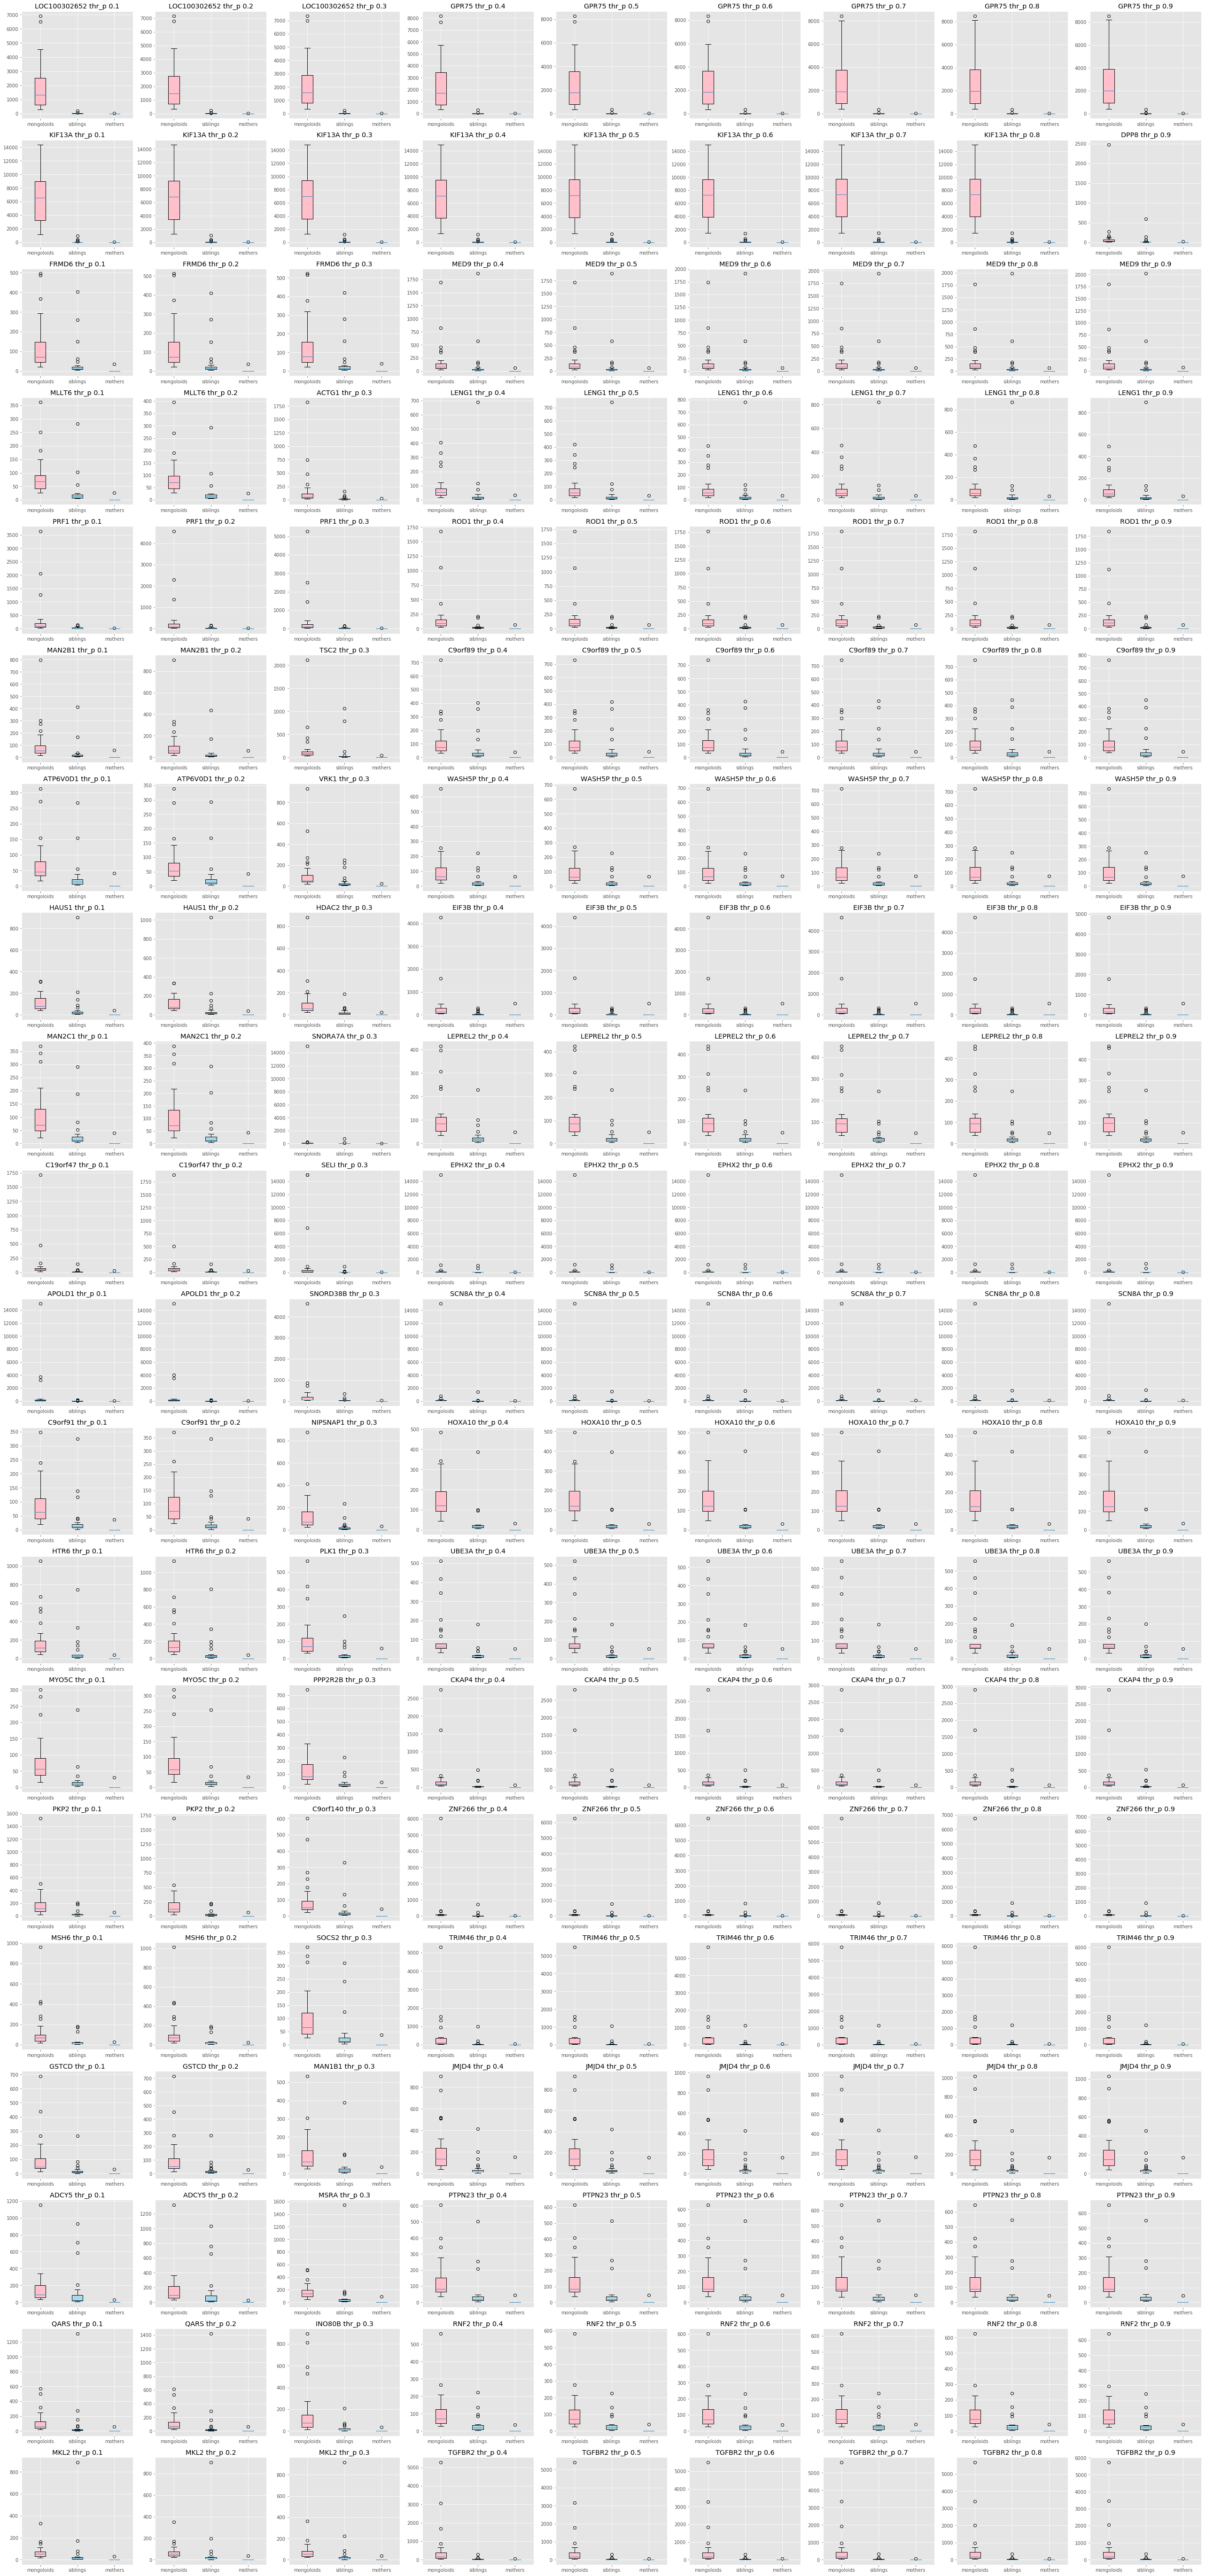

In [7]:
from sklearn.tree import DecisionTreeClassifier

num_top_genes = 20

def get_genes_by_impurity(X, y, num_top_genes):
    clf = DecisionTreeClassifier(random_state=0)
    genes_mask = np.ones(cur.shape[1], dtype=np.bool)
    genes_ids = []
    for i in range(num_top_genes):
        tree = clf.fit(X[:,genes_mask], y)
        nodes = tree.tree_.__getstate__()['nodes']
        gene_id = nodes[0][2]
        genes_ids.append(gene_id)
        genes_mask[gene_id] = 0
    return genes_ids

fig, axes = plt.subplots(ncols=config.params["thr_p"].num_ticks, nrows=num_top_genes, figsize=(45,100))
for j, thr_p in enumerate(config.params["thr_p"]):
    cur = degrees[j, :, :]
    genes_ids = get_genes_by_impurity(cur[:58], y[:58], num_top_genes)
    print genes_names[genes_ids]
    
    '''
    scur = cur[config.params['mongoloids_mask']].min(axis = 0).argsort()
    genes_ids = np.unique((scur[-num_top_genes:]).flatten())
    print num_top_genes, 'genes to', genes_ids.shape, 'genes'
    genes_ids = genes_ids[:num_top_genes]
    print genes_names[genes_ids]
    
    scur = cur[config.params['siblings_mask']].min(axis = 0).argsort()
    print scur.shape
    genes_ids = np.unique((scur[-num_top_genes:]).flatten())
    print num_top_genes, 'genes to', genes_ids.shape, 'genes'
    genes_ids = genes_ids[:num_top_genes]
    print genes_names[genes_ids]
    '''

    for i, gene_id in enumerate(genes_ids):
        ax = axes[i, j]
        data = [cur[config.params['mongoloids_mask'], gene_id], cur[config.params['siblings_mask'], gene_id], cur[config.params['mothers_mask'], gene_id]]
        labels = ['mongoloids', 'siblings', 'mothers']
        bplot = ax.boxplot(data,
                            vert=True,  # vertical box alignment
                            patch_artist=True,  # fill with color
                            labels=labels)
        #plt.xticks([1, 2, 3], ['mongoloids', 'siblings', 'mothers'])
        #ax.set_title("\n".join(textwrap.wrap(feature_names[i] + ' thr = ' + str(thr_p), 60)))
        colors = ['pink', 'lightblue', 'lightgreen']
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
        
        '''
        ax.hist(cur[config.params['mongoloids_mask'], gene_id], facecolor='r', alpha=0.5)
        ax.hist(cur[config.params['siblings_mask'], gene_id], facecolor='b', alpha=0.5)
        ax.hist(cur[config.params['mothers_mask'], gene_id], facecolor='g', alpha=0.5)
        '''
        ax.set_title(genes_names[gene_id] + ' thr_p ' + str(thr_p))
        
degrees_boxplots_path = config.ofname(["degrees_boxplots"], ext = ".png", include_set = config.params_sets["degrees_boxplots"])
fig.savefig(degrees_boxplots_path)

In [17]:
 config.params['siblings_mask'].get_values()

[array([29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
        46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57])]

In [14]:
config.params['kde_mask'] = param('siblings_mask', name = 'id_pair', manual_ticks = True)

In [4]:
import igraph
import cairo
#def print_progress(message, percent):
#    print message, percent
#igraph.set_progress_handler(print_progress)

In [4]:
diff_tmp_graph_path = config.ofname([["diff_graph",  "tmp"]], ext = ".npz", include_set = config.params_sets["diff_graph"])
diff_graph_path = config.ofname("diff_graph", ext = ".npz", include_set = config.params_sets["diff_graph"])
def make_diff_graph(need_thr = None):
    config.params["id_sample"].manual_ticks = True
    m_mongoloids_or = None
    m_mongoloids_and = None
    m_siblings_or = None
    m_siblings_and = None
    m_mothers_or = None
    m_mothers_and = None
    print diff_graph_path
    for thr_p in config.params["thr_p"]:
        if need_thr != None and thr_p not in set(need_thr):
            continue
        for id_sample in config.params["id_sample"]:
            #print id_sample, '/', config.params["id_sample"].num_ticks
            print config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"])
            data = np.load(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
            g = data['G']
            g = np.unpackbits(g, axis = 1)[:, :X.shape[1]].astype(np.bool)
            if id_sample in config.params["mongoloids_mask"].value:
                if m_mongoloids_or is None:
                    m_mongoloids_or = g
                    m_mongoloids_and = g
                else:
                    m_mongoloids_or = np.logical_or(g, m_mongoloids_or)
                    m_mongoloids_and = np.logical_and(g, m_mongoloids_and)
            
            if id_sample in config.params["siblings_mask"].value:
                if m_siblings_or is None:
                    m_siblings_or = g
                    m_siblings_and = g
                else:
                    m_siblings_or = np.logical_or(g, m_siblings_or)
                    m_siblings_and = np.logical_and(g, m_siblings_and)
                    
            if id_sample in config.params["mothers_mask"].value:
                if m_mothers_or is None:
                    m_mothers_or = g
                    m_mothers_and = g
                else:
                    m_mothers_or = np.logical_or(g, m_mothers_or)
                    m_mothers_and = np.logical_and(g, m_mothers_and)
    
    #m_diff = np.logical_and(m_mongoloids_and, np.logical_not(m_siblings_or))
    m_diff = np.logical_and(m_mongoloids_and, np.logical_not(m_mothers_or))
    np.savez_compressed(diff_graph_path, 
                        m_diff = m_diff, 
                        m_mongoloids_and = m_mongoloids_and, 
                        m_mongoloids_or = m_mongoloids_or, 
                        m_siblings_and = m_siblings_and, 
                        m_siblings_or = m_siblings_or,
                        m_mothers_or = m_mothers_or,
                        m_mothers_and = m_mothers_and)

make_diff_graph([(0.9 - 0.1) / 8 * 2 + 0.1])
m_data = np.load(diff_graph_path)
m_diff = m_data['m_diff']
m_mongoloids_and = m_data['m_mongoloids_and']
m_mongoloids_or = m_data['m_mongoloids_or']
m_siblings_and = m_data['m_siblings_and']
m_siblings_or = m_data['m_siblings_or']
m_mothers_or = m_data['m_mothers_or']
m_mothers_and = m_data['m_mothers_and']
m_data.close()
print m_diff.shape, m_diff.sum(), m_mongoloids_and.sum(), m_mothers_or.sum()

F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\diff_graph.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.3_id_sample_0.npz


KeyError: 'mongoloids_mask'

In [8]:
diff_tmp_graph_path = config.ofname([["diff_graph",  "tmp"]], ext = ".npz", include_set = config.params_sets["diff_graph"])
diff_graph_path = config.ofname("diff_graph", ext = ".npz", include_set = config.params_sets["diff_graph"])
def make_diff_graph(need_thr = None):
    config.params["id_sample"].manual_ticks = True
    m_control_or = None
    m_control_and = None
    m_cancer_or = None
    m_cancer_and = None
    print diff_graph_path
    for thr_p in config.params["thr_p"]:
        if need_thr != None and thr_p not in set(need_thr):
            continue
        for id_sample in config.params["id_sample"]:
            #print id_sample, '/', config.params["id_sample"].num_ticks
            print config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"])
            data = np.load(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
            g = data['G']
            g = np.unpackbits(g, axis = 1)[:, :X.shape[1]].astype(np.bool)
            if id_sample in config.params["control_mask"].value:
                if m_control_or is None:
                    m_control_or = g
                    m_control_and = g
                else:
                    m_control_or = np.logical_or(g, m_control_or)
                    m_control_and = np.logical_and(g, m_control_and)
                    
            if id_sample in config.params["cancer_mask"].value:
                if m_cancer_or is None:
                    m_cancer_or = g
                    m_cancer_and = g
                else:
                    m_cancer_or = np.logical_or(g, m_cancer_or)
                    m_cancer_and = np.logical_and(g, m_cancer_and)
    
    m_diff = np.logical_and(m_cancer_and, np.logical_not(m_control_or))
    np.savez_compressed(diff_graph_path, 
                        m_diff = m_diff, 
                        m_control_and = m_control_and, 
                        m_control_or = m_control_or,
                        m_cancer_or = m_cancer_or,
                        m_cancer_and = m_cancer_and)

make_diff_graph([(0.9 - 0.1) / 8 * 0 + 0.1])
m_data = np.load(diff_graph_path)
m_diff = m_data['m_diff']
m_control_and = m_data['m_control_and']
m_control_or = m_data['m_control_or']
m_cancer_or = m_data['m_cancer_or']
m_cancer_and = m_data['m_cancer_and']
m_data.close()
print m_diff.shape, m_diff.sum(), m_control_and.sum(), m_cancer_or.sum()

F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\diff_graph.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_0.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_1.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_2.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_3.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_4.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_5.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_6.npz


F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_63.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_64.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_65.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_66.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_67.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_68.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_69.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\g

F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_127.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_128.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_129.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_130.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_131.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_132.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_133.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\g

F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_191.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_192.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_193.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_194.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_195.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_196.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_197.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\g

F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_255.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_256.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_257.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_258.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_259.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_260.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_261.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\g

F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_319.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_320.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_321.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_322.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_323.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_324.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_325.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\g

F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_383.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_384.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_385.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_386.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_387.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_388.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_389.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\g

F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_447.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_448.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_449.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_450.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_451.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_452.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\graphs\graph_thr_p_0.1_id_sample_453.npz
F:\PC\UNN\Scientific\Cancer\data\2018.09.01\params\num_genes_18483\kde_mask_control_mask\g

(353L, 353L) 2 665 62128


In [10]:
m_diff = np.logical_and(m_mongoloids_and, np.logical_not(m_siblings_or))
m_diff = np.logical_and(m_mongoloids_and, np.logical_not(m_mothers_or))

In [5]:
print m_mongoloids_and.sum(), m_mothers_or.sum()
#m_diff = np.logical_and(m_mongoloids_and, np.logical_not(m_mothers_or))
m_diff = m_mongoloids_and
'''
np.savez_compressed(diff_graph_path, 
                    m_diff = m_diff, 
                    m_mongoloids_and = m_mongoloids_and, 
                    m_mongoloids_or = m_mongoloids_or, 
                    m_siblings_and = m_siblings_and, 
                    m_siblings_or = m_siblings_or,
                    m_mothers_or = m_mothers_or,
                    m_mothers_and = m_mothers_and)
'''
print m_diff.sum()

22297 62122057
22297


In [40]:
print vertices
print genes_names[vertices]
print len(np.unique(vertices))

[   61   104   313   403   712   751   833  1083  1255  1301  1306  1323
  1573  1624  1672  1815  2321  2515  2555  2771  2947  2977  3083  3251
  3277  3283  3494  3523  3536  3563  3685  3758  3798  3917  4006  4069
  4122  4142  4420  4496  4504  4822  4911  4967  5200  5347  5418  5459
  5554  5607  5699  5824  5980  6065  6111  6179  6214  6441  6457  6482
  6601  6779  6802  6822  6912  7065  7149  7771  8001  8112  8180  8275
  8646  8699  8955  9077  9343  9603 10096 10123 10277 10308 10650 10843
 10875 10985 11008 11068 11309 11400 11511 11950 11991 12020 12086 12180
 12347 12412 12476 12600 12965 13088 13217 13327 13374 13585 13821 13911
 13961 14013 14599 14755 14998]
['CMAH' 'DLL1' 'OLFML2A' 'PTPN3' 'GALE' 'GDF10' 'LYNX1' 'NUF2' 'MATN2'
 'RAI14' 'LDB3' 'SOX10' 'PYDC1' 'HIST1H2BB' 'SLC4A3' 'IGFBP1' 'FBXL5'
 'NAPEPLD' 'CENPBD1' 'RNF181' 'RBBP9' 'SMARCD3' 'BHLHA15' 'DOM3Z' 'COX4I2'
 'STK19' 'FTHL3' 'DSC2' 'SH3GL1' 'ZNF347' 'ATPAF1' 'FSD1' 'TMEM125'
 'FOXP4' 'LGR4' 'LAMA3' 'KC

In [82]:
intersect_genes_ = np.sort(np.array(list(set(genes_ids_) & set(vertices))))
print genes_names[vertices], len(vertices)
for gene_id in vertices:
    print genes_names[gene_id]

NameError: name 'genes_ids_' is not defined

In [39]:
#m_diff_s = np.delete(m_diff, (11511), axis=0)
#m_diff_s = np.delete(m_diff_s, (11511), axis=1)
e_diff = np.transpose(np.nonzero(m_diff))
print e_diff.shape
#mask = (e_diff[:, 0] != 2013) & (e_diff[:, 1] != 2013)
vertices = np.sort(np.unique(np.concatenate([e_diff[:, :].flatten()])))
#print vertices, len(vertices)

m_sub = m_diff[np.ix_(vertices, vertices)]
e_diff = np.transpose(np.nonzero(m_sub))

#g_diff = igraph.Graph.Adjacency(m_diff.tolist(), mode=igraph.ADJ_UNDIRECTED)
#g_diff = igraph.Graph.Adjacency(m_diff.tolist(), mode=igraph.ADJ_UNDIRECTED)
#vertices = #range(m_sub.shape[0])
print len(vertices), e_diff.shape[0]
g_diff = igraph.Graph(vertex_attrs={"label":genes_names[vertices]}, edges=e_diff.tolist(), directed=False)

(112L, 2L)
113 112


In [73]:
print vertices

[ 0 24 68]


In [75]:
print cpgs_names[vertices]

['cg00075967' 'cg03103192' 'cg09418283']


In [81]:
for v in vertices:
    print genes_names[v], v
for e in e_diff:
    print e[0], e[1]

RUNX1 676
ABHD6 3534
GLUD1 6350
MAN2A1 8652
GPAA1 12405
FAM35A 12469
0 2
0 5
1 4
3 4


In [33]:
print np.nonzero(genes_names == 'KIF13A')


(array([2013], dtype=int64),)


In [77]:
a = g_diff.degree()
print genes_names[11511]

for i, x in enumerate(a):
    if x > 1:
        print i, x

CCDC60
7 2
8 7
27 2
31 5
32 2
35 2
45 13


In [90]:
#m_and = np.logical_and(m_mongoloids, m_siblings)
print m_diff.sum(), g_diff.ecount(), g_diff.vcount()

766 40 47


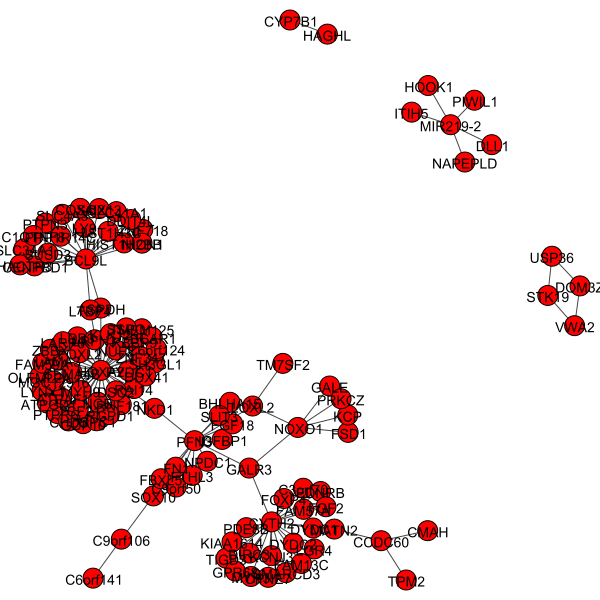

In [8]:
layout = g_diff.layout("kk")
#layout = g_diff.layout("sphere")
igraph.plot(g_diff, layout = layout)

In [57]:
# calculate dendrogram
comm = g_diff_chr.community_multilevel()
#m_comm = m_diff

In [100]:
fcomm = g_comm.community_fastgreedy()

In [ ]:
igraph.plot(fcomm)

6 6


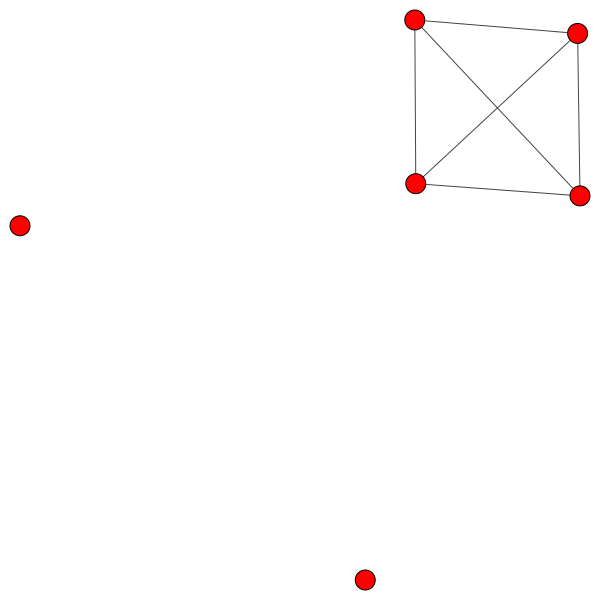

In [58]:
#igraph.plot(comm, mark_groups = True)
#comm = comms[0]
#
cl_g = comm.cluster_graph()
print cl_g.ecount(), cl_g.vcount()
igraph.plot(cl_g)

In [59]:
print len(comm)
for i in range(len(comm)):
    if len(comm[i]) > 1:
        print i, len(comm[i])

11
0 2
1 8
2 2
3 3
4 2
5 727
6 2
7 2
8 7
9 4
10 14


In [60]:
# 128, 1
mycomm = comm[5]
print len(mycomm)
m_comm = m_diff[np.ix_(mycomm, mycomm)]
g_comm = igraph.Graph.Adjacency(m_comm.tolist(), mode=igraph.ADJ_UNDIRECTED)
comm = g_comm.community_multilevel()
print g_comm.ecount(), g_comm.vcount()

727
0 727


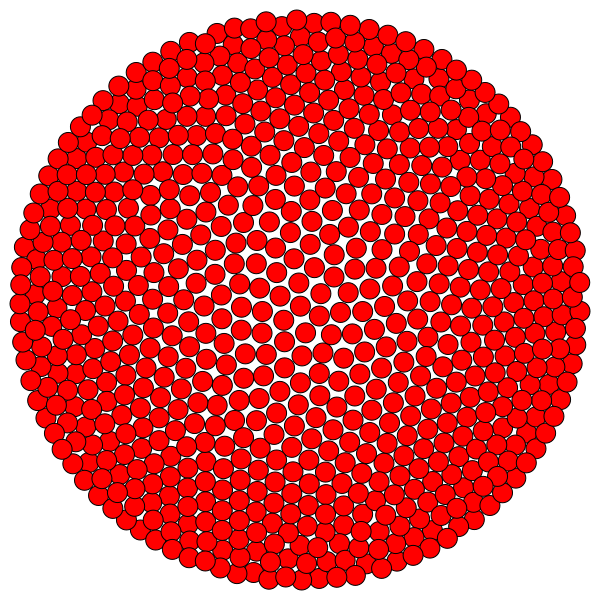

In [55]:
g = g_comm
layout = g.layout("kk")
igraph.plot(g)

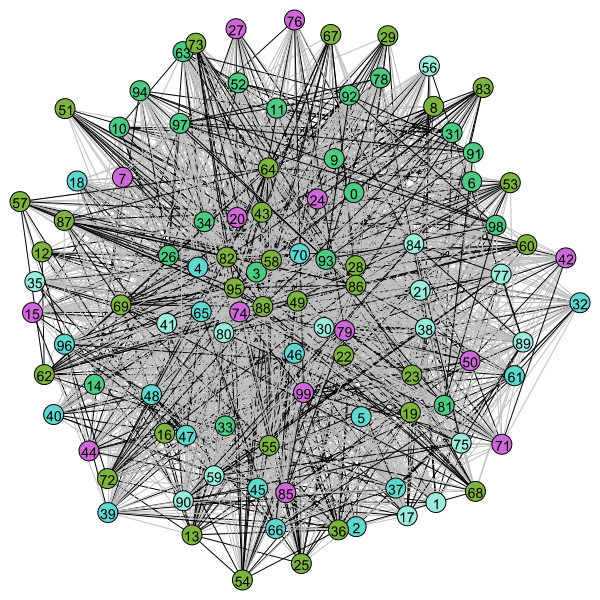

In [93]:
from random import randint

membership = comm.membership

if membership is not None:
    gcopy = g.copy()
    edges = []
    edges_colors = []
    for edge in g.es():
        if membership[edge.tuple[0]] != membership[edge.tuple[1]]:
            edges.append(edge)
            edges_colors.append("gray")
        else:
            edges_colors.append("black")
    gcopy.delete_edges(edges)
    layout = gcopy.layout("kk")
    g.es["color"] = edges_colors
else:
    layout = g.layout("kk")
    g.es["color"] = "gray"
visual_style = {}
visual_style["vertex_label_dist"] = 0
visual_style["vertex_shape"] = "circle"
visual_style["edge_color"] = g.es["color"]
# visual_style["bbox"] = (4000, 2500)
visual_style["vertex_size"] = 30
visual_style["layout"] = layout
visual_style["bbox"] = (1024, 768)
visual_style["margin"] = 40
#visual_style["edge_label"] = g.es["weight"]
for vertex in g.vs():
    vertex["label"] = vertex.index
if membership is not None:
    colors = []
    for i in range(0, max(membership)+1):
        colors.append('%06X' % randint(0, 0xFFFFFF))
    for vertex in g.vs():
        vertex["color"] = str('#') + colors[membership[vertex.index]]
    visual_style["vertex_color"] = g.vs["color"]
igraph.plot(g)


In [91]:
def func():
    igraph.plot(g)

In [26]:
interest_genes = ["CCDC60", "KIF13A", "BOLA2"]
id_genes = []
for gene in interest_genes:
    x = (genes_names == gene).nonzero()[0]
    cur = (vertices == x[0]).nonzero()[0]
    id_genes.append((gene, cur[0], x[0]))
id_genes

[('CCDC60', 135, 11511), ('KIF13A', 28, 2013), ('BOLA2', 33, 2514)]

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def calc_anti_intersection(clf, data, control_mask, diseased_mask):
    dist = clf.decision_function(data)
    #print dist.shape
    #print dist
    gap = dist[diseased_mask].min() - dist[control_mask].max()
    #print diseased_mask, control_mask
    #print dist[diseased_mask], dist[control_mask]
    return gap

def calc_svc_models(X, y, control_mask, diseased_mask):
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C), 
              #svm.LinearSVC(),
              #svm.SVC(kernel='rbf', gamma=0.7, C=C),
              #svm.SVC(kernel='poly', degree=3, C=C)
             )
    models = (clf.fit(X, y) for clf in models)

    for clf in models:
        return calc_anti_intersection(clf, X, control_mask, diseased_mask)

def scater_down_syndrome(ax, xu, xv, Y, gene_name_u, gene_name_v):
    labels = ['Down', 'Siblings', 'Mothers']
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    ax.set_prop_cycle('color', [colors[0], colors[5], colors[1]])

    for c in [0, 1, 2]:
        ax.scatter(xu[Y == c], xv[Y == c], 500, label = labels[c], alpha=0.7)

    for j in range(len(xu)):
        ax.text(xu[j], xv[j], str(j), horizontalalignment='center', verticalalignment='center', fontsize = 15)

    mean_p = []
    for c in [0, 1, 2]:
        mean_p.append([xu[Y == c].mean(), xv[Y == c].mean()])
    for c in [0, 1]:
        #plt.arrow(mean_p[2][0], mean_p[2][1], mean_p[c][0] - mean_p[2][0], mean_p[c][1] - mean_p[2][1], color = 'k')
        ax.annotate("", xy=(mean_p[c][0], mean_p[c][1]), xycoords='data', xytext=(mean_p[2][0], mean_p[2][1]),  textcoords='data', arrowprops=dict(shrink = 4,facecolor='black'), fontsize=20)

    #k = (mean_p[0][1] - mean_p[2][1]) / (mean_p[0][0] - mean_p[2][0])
    #if abs(k) > k_thr or abs(k) < 1.0 / k_thr:
    #    continue
    #s = "k = {:0.2e}".format(k)
    #plt.text(0.17, 0.95, s, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, fontsize = 50)

    ax.set_xlabel(gene_name_u, fontsize=70)
    ax.set_ylabel(gene_name_v, fontsize=70)
    ax.legend(framealpha=0.9, fontsize=50, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0., handletextpad=0.3, scatterpoints=3)    

def scater_down_syndrome_2(ax, xu, xv, Y, gene_name_u, gene_name_v):
    labels = ['Down', 'Health']
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    ax.set_prop_cycle('color', [colors[0], colors[5]])

    for c in [0, 1]:
        ax.scatter(xu[Y == c], xv[Y == c], 500, label = labels[c], alpha=0.7)

    for j in range(len(xu)):
        ax.text(xu[j], xv[j], str(j), horizontalalignment='center', verticalalignment='center', fontsize = 15)

    mean_p = []
    for c in [0, 1]:
        mean_p.append([xu[Y == c].mean(), xv[Y == c].mean()])
    #for c in [0]:
        #plt.arrow(mean_p[2][0], mean_p[2][1], mean_p[c][0] - mean_p[2][0], mean_p[c][1] - mean_p[2][1], color = 'k')
    #    ax.annotate("", xy=(mean_p[c][0], mean_p[c][1]), xycoords='data', xytext=(mean_p[2][0], mean_p[2][1]),  textcoords='data', arrowprops=dict(shrink = 4,facecolor='black'), fontsize=20)

    #k = (mean_p[0][1] - mean_p[2][1]) / (mean_p[0][0] - mean_p[2][0])
    #if abs(k) > k_thr or abs(k) < 1.0 / k_thr:
    #    continue
    #s = "k = {:0.2e}".format(k)
    #plt.text(0.17, 0.95, s, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, fontsize = 50)

    ax.set_xlabel(gene_name_u, fontsize=70)
    ax.set_ylabel(gene_name_v, fontsize=70)
    ax.legend(framealpha=0.9, fontsize=50, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0., handletextpad=0.3, scatterpoints=3)    
    
def scater_cancer(ax, xu, xv, Y, gene_name_u, gene_name_v):
    labels = ['Control', 'Health', 'Cancer']
    names = ['control_mask', 'health_mask', 'cancer_mask']
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    ax.set_prop_cycle('color', [colors[0], colors[5], colors[1]])

    for c in [0, 1, 2]:
        cur_mask = config.params[names[c]].value
        ax.scatter(xu[cur_mask], xv[cur_mask], 500, label = labels[c], alpha=0.7)

    for j in range(len(xu)):
        ax.text(xu[j], xv[j], str(j), horizontalalignment='center', verticalalignment='center', fontsize = 15)

    mean_p = []
    for c in [0, 1, 2]:
        cur_mask = config.params[names[c]].value
        mean_p.append([xu[cur_mask].mean(), xv[cur_mask].mean()])
    for c in [0, 1]:
        #plt.arrow(mean_p[2][0], mean_p[2][1], mean_p[c][0] - mean_p[2][0], mean_p[c][1] - mean_p[2][1], color = 'k')
        ax.annotate("", xy=(mean_p[c][0], mean_p[c][1]), xycoords='data', xytext=(mean_p[2][0], mean_p[2][1]),  textcoords='data', arrowprops=dict(shrink = 4,facecolor='black'), fontsize=20)

    #k = (mean_p[0][1] - mean_p[2][1]) / (mean_p[0][0] - mean_p[2][0])
    #if abs(k) > k_thr or abs(k) < 1.0 / k_thr:
    #    continue
    #s = "k = {:0.2e}".format(k)
    #plt.text(0.17, 0.95, s, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, fontsize = 50)

    ax.set_xlabel(gene_name_u, fontsize=70)
    ax.set_ylabel(gene_name_v, fontsize=70)
    ax.legend(framealpha=0.9, fontsize=50, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0., handletextpad=0.3, scatterpoints=3)    
    
    
def plot_kde(ax, xu, xv):
    kde_mask = config.params[config.params["kde_mask"].value].value
    data = np.array([xu[kde_mask], xv[kde_mask]]).astype('float32')
    kde = stats.gaussian_kde(data)
    x_min = np.min(xu)
    x_max = np.max(xu)
    y_min = np.min(xv)
    y_max = np.max(xv)
    Xm, Ym = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    positions = np.vstack([Xm.ravel(), Ym.ravel()])
    Z = np.reshape(kde(positions).T, Xm.shape) # score_samples
    im = ax.imshow(np.rot90(Z), cmap="jet", extent=[x_min, x_max, y_min, y_max], aspect='auto')

def plot_kde_dist(fig, ax, xu, xv, threshold_p = 0, num_points = 100000):
    kde_mask = config.params[config.params["kde_mask"].value].value
    data = np.array([xu[kde_mask], xv[kde_mask]]).astype('float32')
    kde = stats.gaussian_kde(data)

    points = kde.resample(num_points)
    pr = np.array(kde(points))
    pr = np.sort(pr)
    
    x_min = np.min(xu)
    x_max = np.max(xu)
    y_min = np.min(xv)
    y_max = np.max(xv)

    Xm, Ym = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    positions = np.vstack([Xm.ravel(), Ym.ravel()])
    threshold_p = 0.9
    ZI = np.zeros(Xm.shape[0] * Xm.shape[1])
    for i, pt in enumerate(positions.T):
        p = kde(np.array([pt[0], pt[1]])) # .reshape(1, -1)
        pos = np.searchsorted(pr, p)
        w = float(num_points - pos) / num_points
        ZI[i] = w
        if ZI[i] < threshold_p:
            ZI[i] = 0
    ZI = np.reshape(ZI, Xm.shape)
    #ZI = np.log(1 - ZI, Xm.shape)
    
    im = ax.imshow(np.rot90(ZI), cmap="jet", extent=[x_min, x_max, y_min, y_max], aspect='auto')#, norm=matplotlib.colors.LogNorm())
    fig.colorbar(im)

    
def plot_calc_models(X, y, xu, xv, Y, gene_name_u, gene_name_v):
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=3, C=C))
    models = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    
    for clf, title, ax in zip(models, titles, sub.flatten()):
        #calc_anti_intersection(clf, X, Y)
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.set_title(title)
        #plt.gcf().subplots_adjust(bottom=0.15, top=0.9, left=0.23, right=0.9)
        #scater_down_syndrome(ax, xu, xv, Y, gene_name_u, gene_name_v)
        scater_cancer(ax, xu, xv, Y, gene_name_u, gene_name_v)
        continue
    
    plt.gcf().legend(framealpha=0.9, fontsize=50, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0., handletextpad=0.3, scatterpoints=3)
        
    '''
    pair_genes_path = config.ofname([["pair_genes", gene_name_u, gene_name_v]], ext = ".png", include_set = config.params_sets["pair_genes"])
    plt.savefig(pair_genes_path)
    plt.close(fig)
    '''

    plt.show()

In [12]:
from time import time
def genes_pair_svc(X, y):
    m_dist = np.full((X.shape[1], X.shape[1]), -np.inf)
    y = y.flatten()
    
    for u in range(X.shape[1]):#genes_top:
        be = time()
        
        for v in range(X.shape[1]): # genes_top:
            #if u <= v: continue 
            xu = X[:, u]
            xv = X[:, v]

            xu = (xu - xu.mean()) / xu.std()
            xv = (xv - xv.mean()) / xv.std()

            data = np.array([xu, xv]).T
            #control_mask = np.concatenate([config.params['mothers_mask'].value, config.params['siblings_mask'].value])
            y = y == 0
            assert(len(np.unique(y)) == 2)
            m_dist[u, v] = calc_svc_models(data, y, config.params['siblings_mask'].value, config.params['mongoloids_mask'].value)
            #m_dist[u, v] = calc_svc_models(data, y, config.params['control_mask'].value, config.params['cancer_mask'].value)
            #if v % 1000 == 0:
            #    print v, time() - be, m_dist[u, :(v+1)].max()
        print u, time() - be, (m_dist[u] > 1).sum(), m_dist[u, :].max()
    return m_dist

m_dist = genes_pair_svc(X, y)
#print X[0,0]

0 11.0659999847 0 0.9993282644930476


KeyboardInterrupt: 

In [63]:
#I, J = np.unravel_index((m_dist > 1).argmax(), m_dist.shape)
#print I, J, m_dist[I, J]
I, J = np.nonzero(m_dist > 0)
print I, J

[] []


In [34]:
m_dist

array([[-2.22044605e-16, -2.22044605e-16, -0.00000000e+00, ...,
        -0.00000000e+00,  1.11022302e-16, -5.55111512e-16],
       [-2.22044605e-16,  3.33066907e-16,  2.22044605e-16, ...,
        -0.00000000e+00, -2.22044605e-16,  3.33066907e-16],
       [-0.00000000e+00,  2.22044605e-16, -1.11022302e-16, ...,
        -0.00000000e+00, -3.33066907e-16, -2.22044605e-16],
       ...,
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.11022302e-16, -2.22044605e-16, -3.33066907e-16, ...,
        -0.00000000e+00, -2.22044605e-16,  3.33066907e-16],
       [-5.55111512e-16,  3.33066907e-16, -2.22044605e-16, ...,
        -0.00000000e+00,  3.33066907e-16, -0.00000000e+00]])

In [46]:
def genes_pair_plot(X, y, vertices, edges, genes_names):
    #edges = np.concatenate((edges, np.array([edges[:, 1], edges[:, 0]]).T))
    
    import seaborn
    seaborn.set_style('darkgrid', {'legend.frameon':True})
    
    config.params["id_pair"] = param(value_be = 0, value_en = len(edges) - 1, num_ticks = len(edges), name = 'id_pair', manual_ticks = True)
    y = y.flatten()
    pu = -1
    k_thr = 3
    
    for i, e in enumerate(edges):
        config.params["id_pair"].set_tick(i)
        fig = plt.figure(figsize=(20,15))
        ax = plt.gca()
        #fig.set_visible(not fig.get_visible())
        
        
        u = vertices[e[0]]
        v = vertices[e[1]]
        print u, v, genes_names[u], genes_names[v]
        xu = X[:, u]
        xv = X[:, v]
        
        xu = (xu - xu.mean()) / xu.std()
        xv = (xv - xv.mean()) / xv.std()
        
        #mothers_mask = config.params["mothers_mask"].value
        #mongoloids_mask = config.params["mongoloids_mask"].value
        data = np.array([xu, xv]).astype('float32').T
        print data.shape
        
        plot_kde_dist(fig, ax, xu, xv)
        scater_down_syndrome_2(ax, xu, xv, y, genes_names[u], genes_names[v])

        pair_genes_path = config.ofname([["kdes", genes_names[u], genes_names[v]]], ext = ".png", include_set = config.params_sets["kdes"])
        plt.savefig(pair_genes_path)
        plt.close(fig)

        #scater_cancer(ax, xu, xv, y, genes_names[u], genes_names[v])
        #plot_calc_models(data, y == 0, xu, xv, y, genes_names[u], genes_names[v])
        #break
        
        
#edges = [[135, 28],[28, 135],[135, 33]]
#edges = [[0,1],[1,2]]
edges = np.array(e_diff)

#print genes_names[vertices]
#horvath
#vertices = np.array([0, 24, 68, 269, 223, 36, 306])
#edges = np.array([[0, 1], [0, 2], [0, 3], [0, 4], [5, 4], [5, 6]])

#vertices = np.arange(X.shape[1])
#edges = np.array([I, J]).T
print edges.shape
genes_pair_plot(X, y, vertices, edges, genes_names_2)
#genes_pair_plot(X, y, vertices, edges, genes_names)
#genes_pair_plot(X, y, np.array([id1,id2]), np.array([[0,1],[1,0]]), genes_names)
#genes_pair_plot(X, y, np.array([0,1]), np.array([[0,1],[1,0]]), genes_names)
#genes_pair_plot(X, y, np.array([I,J]), np.array([[0,1],[1,0]]), cpgs_names)

(112L, 2L)
4727 2159 CMAH CCDC60
(71L, 2L)
941 5157 DLL1 MIR219-2
(71L, 2L)
6906 3761 OLFML2A HOXA2
(71L, 2L)
14645 11003 PTPN3 BCL9L
(71L, 2L)
6890 7736 GALE NOXO1
(71L, 2L)
2158 3761 GDF10 HOXA2
(71L, 2L)
3436 3761 LYNX1 HOXA2
(71L, 2L)
10152 3761 NUF2 HOXA2
(71L, 2L)
7127 8945 MATN2 CYTH2
(71L, 2L)
7127 2159 MATN2 CCDC60
(71L, 2L)
2141 3761 RAI14 HOXA2
(71L, 2L)
4769 3761 LDB3 HOXA2
(71L, 2L)
9120 5078 SOX10 PFN3
(71L, 2L)
9120 14426 SOX10 C9orf106
(71L, 2L)
1437 3761 PYDC1 HOXA2
(71L, 2L)
10746 11003 HIST1H2BB BCL9L
(71L, 2L)
13224 11003 SLC4A3 BCL9L
(71L, 2L)
1226 5078 IGFBP1 PFN3
(71L, 2L)
8349 5078 FBXL5 PFN3
(71L, 2L)
12018 5157 NAPEPLD MIR219-2
(71L, 2L)
1637 11003 CENPBD1 BCL9L
(71L, 2L)
14333 3761 RNF181 HOXA2
(71L, 2L)
2476 3761 RBBP9 HOXA2
(71L, 2L)
4322 8945 SMARCD3 CYTH2
(71L, 2L)
4986 5078 BHLHA15 PFN3
(71L, 2L)
4059 1380 DOM3Z USP36
(71L, 2L)
4059 8237 DOM3Z VWA2
(71L, 2L)
14655 11003 COX4I2 BCL9L
(71L, 2L)
4058 1380 STK19 USP36
(71L, 2L)
4058 8237 STK19 VWA2
(71L, 2L)

In [3]:
import numpy as np
print np.arange(0, 110, 5)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105]


In [22]:
def get_correlated_edges(X, y, edges, vertices = None):
    #edges = np.concatenate((edges, np.array([edges[:, 1], edges[:, 0]]).T))
    y = y.flatten()
    k_thr = 5
    edges_corr = []
    weights_corr = []
    for i, e in enumerate(edges):
        if vertices is None:
            u = e[0]
            v = e[1]
        else:
            u = vertices[e[0]]
            v = vertices[e[1]]
        xu = X[:, u]
        xv = X[:, v]
        
        xu = (xu - xu.mean()) / xu.std()
        xv = (xv - xv.mean()) / xv.std()
        mean_p = []
        for c in [0, 1, 2]:
            mean_p.append([xu[y == c].mean(), xv[y == c].mean()])
        
        k = (mean_p[0][1] - mean_p[2][1]) / (mean_p[0][0] - mean_p[2][0])
        if abs(k) > k_thr or abs(k) < 1.0 / k_thr:
            continue
        if abs(k) < 1:
            k = 1 / k
            e[0], e[1] = e[1], e[0] 
        edges_corr.append(e)
        weights_corr.append(k)
    return np.array(edges_corr), np.array(weights_corr)
#edges_corr, weights_corr = get_correlated_edges(X, y, e_diff, vertices)
#print edges_corr.shape

In [11]:
g_corr = igraph.Graph(vertex_attrs={"label":genes_names[vertices]}, edges=edges_corr.tolist(), directed=True)
v_empty = np.flatnonzero((np.array(g_corr.degree()) == 0).flatten()).tolist()
g_corr.delete_vertices(list(v_empty))
g_corr.es["weight"] = weights_corr

In [51]:
def save_graph(graph_path, g):
    labels = g.vs["label"]
    #weights = g.es["weight"]
    edges = [edge.tuple for edge in g.es]
    np.savez_compressed(graph_path, 
                        labels = labels, 
                        #weights = weights, 
                        edges = edges)

def load_graph(graph_path):
    g_data = np.load(graph_path)
    g = igraph.Graph(vertex_attrs={"label":g_data["labels"]}, edges=g_data["edges"].tolist(), directed=False)
    return g
    
#diff_small_graph_path = config.ofname([["diff_graph",  "small_2"]], ext = ".npz", include_set = config.params_sets["diff_graph"])
#save_graph(diff_small_graph_path, g_diff)

In [26]:
g_corr.vs["label"]

['CMAH',
 'DLL1',
 'PTPN3',
 'GALE',
 'MATN2',
 'SOX10',
 'SLC4A3',
 'FBXL5',
 'CENPBD1',
 'SMARCD3',
 'BHLHA15',
 'DOM3Z',
 'COX4I2',
 'STK19',
 'FTHL3',
 'DSC2',
 'ZNF347',
 'ATPAF1',
 'FSD1',
 'FOXP4',
 'LAMA3',
 'KCP',
 'KCNJ3',
 'CYP7B1',
 'SEMA4B',
 'MYH3',
 'MIR219-2',
 'DYDC2',
 'LY9',
 'GPC1',
 'SLC34A1',
 'C6orf141',
 'TIGD3',
 'DYDC1',
 'TM7SF2',
 'TCF21',
 'PHACTR3',
 'USP36',
 'FAM59A',
 'FOXL2',
 'LOXL2',
 'C9orf50',
 'GALR3',
 'CYTH2',
 'DDX41',
 'HOOK1',
 'HAGHL',
 'ASPDH',
 'NKD1',
 'PRKCZ',
 'BCL9L',
 'LRFN3',
 'KIAA1614',
 'MGC12916',
 'SOX13',
 'FN1',
 'FGF18',
 'SLC41A1',
 'NOXO1',
 'PFN3',
 'PDE8B',
 'SLIT3',
 'HOXA2',
 'SUSD3',
 'CCDC60',
 'LTBP4',
 'PTPRG',
 'PIWIL1',
 'C6orf124',
 'NPDC1',
 'DIRC3',
 'C9orf106']

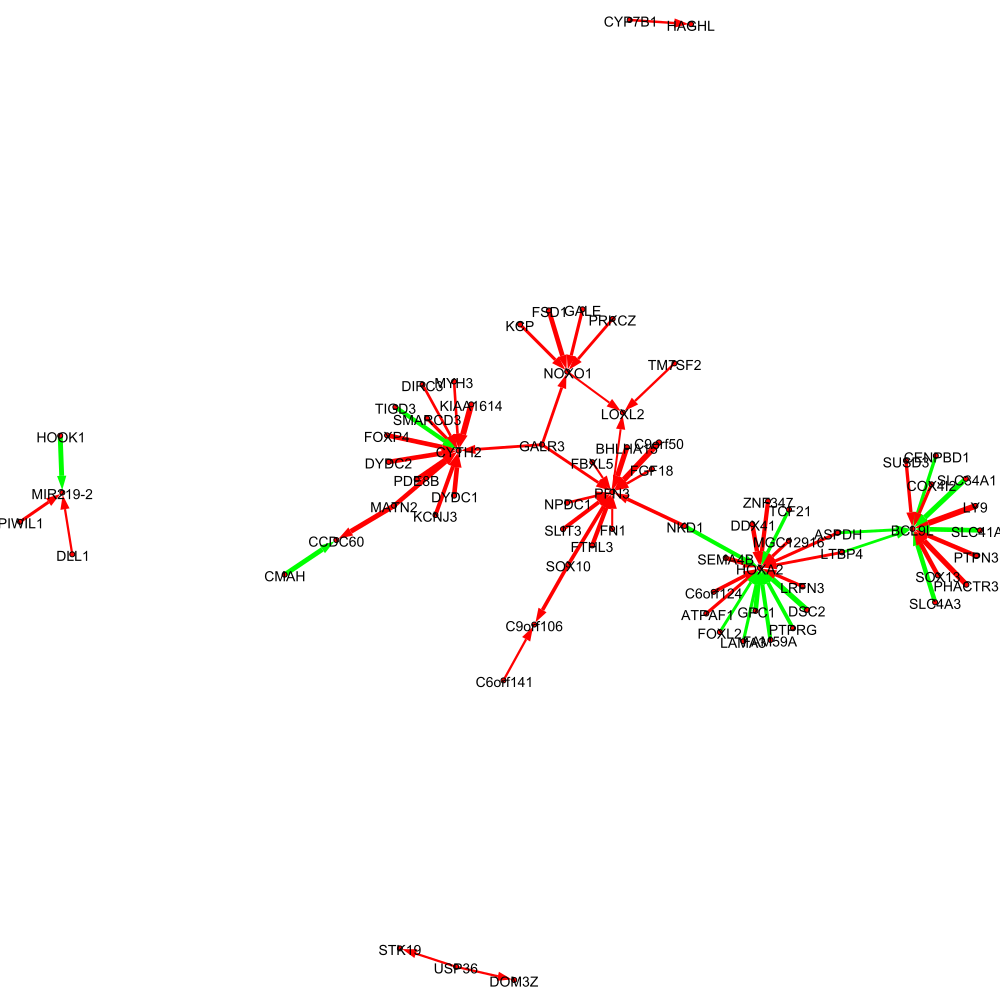

In [13]:
layout = g_corr.layout("kk")
#g_corr.es["label"] = map(lambda x: "{:0.1f}".format(x), g_corr.es["weight"])
g_corr.es["color"] = 'red'
e_positive = g_corr.es.select(weight_gt=0)
e_positive["color"] = 'green'
#layout = g_diff.layout("sphere")

visual_style = {}
visual_style["vertex_size"] = 5
#visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["gender"]]
#visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [1 + abs(weight) for weight in g_corr.es["weight"]]
visual_style["layout"] = layout
visual_style["bbox"] = (1000, 1000)
visual_style["margin"] = 20

igraph.plot(g_corr, **visual_style)

In [14]:
genes_pair_plot(X, y, [0,1,2], [[0,1],[1,2]], genes_names)

In [120]:
def genes_kde_plot(X, y, vertices, edges, genes_names):
    from configuration import param
    import matplotlib.pylab as pylab
    import seaborn
    seaborn.set_style('darkgrid', {'legend.frameon':True})
    fontsize = 50
    params = {'legend.fontsize': fontsize,
      'figure.figsize': (20, 15),
     'axes.labelsize': fontsize,
     'axes.titlesize':fontsize,
     'xtick.labelsize':fontsize,
     'ytick.labelsize':fontsize}
    pylab.rcParams.update(params)

    config.params["id_pair"] = param(value_be = 0, value_en = len(edges) - 1, num_ticks = len(edges), name = 'id_pair', manual_ticks = True)
    y = y.flatten()
    pu = -1
    for i, e in enumerate(edges):
        config.params["id_pair"].set_tick(i)
        fig = plt.figure()
        #fig.set_visible(not fig.get_visible())
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        #plt.gca().set_prop_cycle('color', [colors[0], colors[1], colors[5]])
        u = vertices[e[0]]
        v = vertices[e[1]]
        kde_mask = config.params[config.params["kde_mask"].value].value
        xu = X[:, u]
        xv = X[:, v]
        data = np.array([xu[kde_mask], xv[kde_mask]]).astype('float32')
        kde = stats.gaussian_kde(data)
        x_min = np.min(xu)
        x_max = np.max(xu)
        y_min = np.min(xv)
        y_max = np.max(xv)
        Xm, Ym = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
        positions = np.vstack([Xm.ravel(), Ym.ravel()])
        Z = np.reshape(kde(positions).T, Xm.shape) # score_samples
        im = plt.imshow(np.rot90(Z), cmap="jet", extent=[x_min, x_max, y_min, y_max], aspect='auto')
        fig.colorbar(im)
        plt.gcf().subplots_adjust(bottom=0.15, top=0.9, left=0.15, right=0.95)
        #plt.axis('equal')
        plt.xlabel(genes_names[u])
        plt.ylabel(genes_names[v])
        
        pair_genes_path = config.ofname([["kdes", genes_names[u], genes_names[v]]], ext = ".png", include_set = config.params_sets["kdes"])
        plt.savefig(pair_genes_path)
        pair_genes_path = config.ofname([["kdes", genes_names[v], genes_names[u]]], ext = ".png", include_set = config.params_sets["kdes"])
        plt.savefig(pair_genes_path)
        plt.close(fig)

edges = [[135, 28],[28, 135],[135, 33]]
#genes_kde_plot(X, y, vertices, edges, genes_names)
genes_kde_plot(X, y, np.array([id1, id2]), np.array([[0,1],[1,0]]), genes_names)


ValueError: too many values to unpack

<Figure size 1440x1080 with 0 Axes>

In [132]:
def genes_kde_dist_plot(X, y, vertices, edges, genes_names):
    from configuration import param
    import matplotlib.pylab as pylab
    import seaborn
    from transform_data import calc_edge_weight
    seaborn.set_style('darkgrid', {'legend.frameon':True})
    fontsize = 50
    params = {'legend.fontsize': fontsize,
      'figure.figsize': (20, 15),
     'axes.labelsize': fontsize,
     'axes.titlesize':fontsize,
     'xtick.labelsize':fontsize,
     'ytick.labelsize':fontsize}
    pylab.rcParams.update(params)
    num_points = int(1e5)

    config.params["id_pair"] = param(value_be = 0, value_en = len(edges) - 1, num_ticks = len(edges), name = 'id_pair', manual_ticks = True)
    y = y.flatten()
    pu = -1
    for i, e in enumerate(edges):
        config.params["id_pair"].set_tick(i)
        fig = plt.figure()
        #fig.set_visible(not fig.get_visible())
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        #plt.gca().set_prop_cycle('color', [colors[0], colors[1], colors[5]])
        u = vertices[e[0]]
        v = vertices[e[1]]
        xu = X[:, u]
        xv = X[:, v]
        
        threshold_p = 0
        
        kde_mask = config.params[config.params["kde_mask"].value].value
        data = np.array([xu[kde_mask], xv[kde_mask]]).astype('float32')
        print u, v, genes_names[u], genes_names[v]
        kde = stats.gaussian_kde(data)
        
        points = kde.resample(num_points)
        pr = np.array(kde(points))
        pr = np.sort(pr)
        #I = (np.arange(0, num_points + 1)).astype(np.float) / num_points
        #print I[:10], I[:-10]
        #I = np.concatenate([[0], np.cumsum(p)])
        #I /= I[-1]
        
        x_min = np.min(xu)
        x_max = np.max(xu)
        y_min = np.min(xv)
        y_max = np.max(xv)
        
        Xm, Ym = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
        positions = np.vstack([Xm.ravel(), Ym.ravel()])
        
        ZI = np.zeros(Xm.shape[0] * Xm.shape[1])
        for i, pt in enumerate(positions.T):
            p = kde(np.array([pt[0], pt[1]])) # .reshape(1, -1)
            pos = np.searchsorted(pr, p)
            #ind = int(0.1 * num_points)
            #q = pr[ind]
            #ZI[i] = p < q

            #w = (I[-1] - I[pos])
            w = float(num_points - pos) / num_points
            ZI[i] = w
            if ZI[i] < threshold_p:
                ZI[i] = 0
        ZI = np.reshape(ZI, Xm.shape)
        im = plt.imshow(np.rot90(ZI), cmap="jet", extent=[x_min, x_max, y_min, y_max], aspect='auto')#, norm=matplotlib.colors.LogNorm())
        
        fig.colorbar(im)
        #plt.axis('equal')
        
        plt.xlabel(genes_names[u])
        plt.ylabel(genes_names[v])
        
        plt.gcf().subplots_adjust(bottom=0.15, top=0.9, left=0.15, right=0.95)
        #break
        #continue;
        pair_genes_path = config.ofname([["kdes_dist", genes_names[u], genes_names[v]]], ext = ".png", include_set = config.params_sets["kdes"])
        plt.savefig(pair_genes_path)
        pair_genes_path = config.ofname([["kdes_dist", genes_names[v], genes_names[u]]], ext = ".png", include_set = config.params_sets["kdes"])
        plt.savefig(pair_genes_path)
        plt.close(fig)

edges = [[135, 28],[28, 135],[135, 33]]        
edges = [[135, 33],[33, 135]]
#genes_kde_dist_plot(X, y, vertices, edges, genes_names)
#genes_kde_dist_plot(X, y, vertices, e_diff, genes_names)
genes_kde_dist_plot(X, y, [id1,id2], [[0,1],[1,0]], genes_names)

8112 94 BCL9L IFT140
94 8112 IFT140 BCL9L


In [129]:
print genes_names[0]

SOX9


In [30]:
config.params["thr_p"].set_tick(8)
for id_sample in config.params["id_sample"]:
    #print id_sample, '/', config.params["id_sample"].num_ticks
    print config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"])
    data = np.load(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
    g = data['G']
    g = np.unpackbits(g, axis = 1)[:, :config.params["num_genes"].value].astype(np.bool)
    if not g[2514,11511]:
        print id_sample
    

F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\graphs\graph_thr_p_0.9_id_sample_0.npz
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\graphs\graph_thr_p_0.9_id_sample_1.npz
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\graphs\graph_thr_p_0.9_id_sample_2.npz
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\graphs\graph_thr_p_0.9_id_sample_3.npz
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\graphs\graph_thr_p_0.9_id_sample_4.npz
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\graphs\graph_thr_p_0.9_id_sample_5.npz
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_mothers_mask\graphs\graph_thr_p_0.9_id_sample_6.npz
F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\kde_mask_moth

KeyboardInterrupt: 

In [35]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
genes_chromosome = np.genfromtxt(config.ifname("gene_chromosome"), dtype='str', usecols = [0, 1])
print genes_chromosome.shape

genes_to_chromosome = dict()
for i in range(genes_chromosome.shape[0]):
    genes_to_chromosome[genes_chromosome[i][0]] = int(genes_chromosome[i][1])

(20269L, 2L)


In [44]:
print len(genes_to_chromosome)

20269


In [69]:
e_diff_chr = np.array(e_diff)
vertices_chr = np.array(vertices)
for i in range(len(vertices)):
    vertices_chr[i] = genes_to_chromosome[genes_names[vertices[i]]]

for i in range(len(e_diff)):
    x = e_diff[i][0]
    y = e_diff[i][1]
    e_diff_chr[i][0] = vertices_chr[x]
    e_diff_chr[i][1] = vertices_chr[y]

print len(vertices_chr), e_diff_chr.shape[0]
g_diff_chr = igraph.Graph(edges=e_diff_chr.tolist(), directed=False)
print g_diff_chr.vcount(), g_diff_chr.ecount()

114 112
23 112


In [84]:
#print np.unique(e_diff_chr, 1)
a = np.array([[1, 0, 0], [1, 0, 0], [2, 3, 4]])
np.unique(a, axis=0)

TypeError: unique() got an unexpected keyword argument 'axis'

In [72]:
for vertex in g_diff_chr.vs:
    vertex["label"] = str(vertex.index)
    print vertex["label"]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


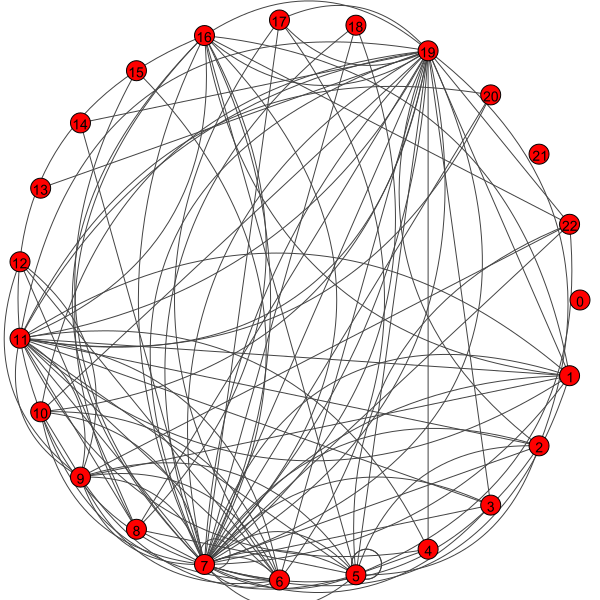

In [74]:
layout = g_diff_chr.layout("circle")
visual_style = {}
visual_style["vertex_label_dist"] = 0
visual_style["vertex_shape"] = "circle"
#visual_style["edge_color"] = g.es["color"]
# visual_style["bbox"] = (4000, 2500)
visual_style["vertex_size"] = 50
visual_style["layout"] = layout
visual_style["bbox"] = (1024, 768)
visual_style["margin"] = 40

igraph.plot(g_diff_chr, layout=layout)

In [24]:
print vertices

[   17    41    94   153   173   266   322   455   464   490   501   521
   650   677   712   759  1028  1069  1360  1408  1602  1705  1724  1740
  1814  1829  1876  1960  2013  2123  2298  2363  2484  2514  2664  2780
  2834  2905  2941  2977  3108  3188  3316  3407  3513  3545  3551  3628
  3771  3822  3830  3981  4136  4183  4197  4299  4352  4429  4516  4581
  4704  4744  4827  4835  4845  4911  4954  5079  5145  5172  5199  5213
  5224  5236  5277  5282  5292  5383  5606  5747  5804  5909  5911  5938
  5974  6117  6441  6488  6869  6877  6895  6913  7026  7036  7065  7092
  7124  7146  7293  7376  7460  7481  7522  7538  7752  7768  7927  8112
  8181  8552  8659  8660  8917  9014  9095  9294  9319  9487  9570  9710
  9758  9885  9964 10065 10157 10167 10357 10402 10514 10764 10815 11088
 11217 11233 11309 11511 11537 11590 11692 11713 11718 11749 11911 11913
 11997 12053 12084 12131 12163 12317 12405 12444 12508 12582 12613 12753
 12765 12823 13119 13162 13256 13744 13810 13855 13

In [75]:
degrees = g_diff_chr.degree()
for i in range(1,23):
    print i, degrees[i]

1 19
2 24
3 3
4 2
5 10
6 17
7 7
8 18
9 17
10 8
11 5
12 3
13 14
14 29
15 12
16 58
17 3
18 0
19 13
20 3
21 4
22 1


In [47]:
ids = np.nonzero(e_diff_chr[:,0] == e_diff_chr[:,1])

print e_diff_chr[ids,0]

[[14  2  2]]


In [73]:
help(igraph.plot)

Help on function plot in module igraph.drawing:

plot(obj, target=None, bbox=(0, 0, 600, 600), *args, **kwds)
    Plots the given object to the given target.
    
    Positional and keyword arguments not explicitly mentioned here will be
    passed down to the C{__plot__} method of the object being plotted.
    Since you are most likely interested in the keyword arguments available
    for graph plots, see L{Graph.__plot__} as well.
    
    @param obj: the object to be plotted
    @param target: the target where the object should be plotted. It can be one
      of the following types:
    
        - C{None} -- an appropriate surface will be created and the object will
          be plotted there.
    
        - C{cairo.Surface} -- the given Cairo surface will be used. This can
          refer to a PNG image, an arbitrary window, an SVG file, anything that
          Cairo can handle.
    
        - C{string} -- a file with the given name will be created and an
          appropriate Cair

# Top threshold graph

In [23]:
id1 = np.flatnonzero(genes_names == 'IFT140')[0]
print genes_names[id1] 
id2 = np.flatnonzero(genes_names == 'BCL9L')[0]
print genes_names[id2]

IFT140
BCL9L
10 29


In [26]:
m_diff = np.logical_and(m_mongoloids_and, np.logical_not(m_siblings_or))
m_sum = m_diff.sum(axis = 0, dtype=np.uint8)
e_thr = np.transpose(np.nonzero(m_sum))
m_sum.shape, m_sum.dtype
print e_thr.shape

e_thr, weights_corr = get_correlated_edges(X, y, e_thr)
print e_thr.shape

num_edges = e_thr.shape[0]
e_thr_mask = np.zeros((num_edges, config.params["thr_p"].num_ticks), np.bool)
e_thr_mask_sum = np.zeros((num_edges, 1), np.int32)

for i in range(num_edges):
    u, v = e_thr[i]
    e_thr_mask[i] = m_diff[:, u, v]
    e_thr_mask_sum[i] = m_sum[u, v]
    
ids = np.argsort(e_thr_mask_sum.flatten())
ids = np.flip(ids)

e_thr_mask = e_thr_mask[ids]
e_thr_mask_sum = e_thr_mask_sum[ids]
e_thr = e_thr[ids]
print e_thr.shape

(15136L, 2L)
(8284L, 2L)
(8284L, 2L)


In [12]:
print np.flatnonzero(genes_names == 'HOXA2')
print e_thr.shape
np.flatnonzero(e_thr[:, 0] == 11309)

[11309]
(134L, 2L)


array([], dtype=int64)

In [27]:
ntop = (e_thr_mask_sum > 0).sum()
print ntop
#print e_thr[:ntop]
#print e_thr_mask_sum[:ntop]
#print e_thr_mask[:ntop]

data_type = [('genes_names_u', 'S32'), ('genes_names_v', 'S32')]
for id_thr, thr_p in enumerate(config.params["thr_p"]):
    data_type.append((str(thr_p), np.uint8))
data_type.append(('mask_sum', np.uint8))    
T = np.zeros(ntop, dtype = data_type)
T['genes_names_u'] = genes_names[e_thr[:ntop, 0]].flatten()
T['genes_names_v'] = genes_names[e_thr[:ntop, 1]].flatten()
for id_thr, thr_p in enumerate(config.params["thr_p"]):
    T[str(thr_p)] = e_thr_mask[:ntop, id_thr].flatten()
T['mask_sum'] = e_thr_mask_sum[:ntop].flatten()

fmt = ('%s','%s','%d','%d','%d','%d','%d','%d','%d','%d','%d', '%d')
print len(T), len(fmt)

top_graph_edges_path = config.ofname([['top_thr_corr_graph'], ['top_edges']], ext = ".csv", include_set = config.params_sets["diff_graph"])
np.savetxt(top_graph_edges_path, T, delimiter=';', fmt=fmt, header = ";".join(list(T.dtype.names)), comments = '')


edges_thr = e_thr[:ntop]
genes_top = np.sort(np.unique(e_thr[:ntop].reshape(ntop * 2)))
genes_top_names = genes_names[genes_top]

for i in range(len(edges_thr)):
    u, v = edges_thr[i]
    u = np.flatnonzero(genes_top == u)[0]
    v = np.flatnonzero(genes_top == v)[0]
    edges_thr[i, 0] = u
    edges_thr[i, 1] = v

print len(genes_top)

#genes_degrees = 
g_top = igraph.Graph(vertex_attrs={"label":genes_top_names}, edges=edges_thr.tolist(), directed=False)

top_graph_genes_path = config.ofname([['top_thr_corr_graph'], ['top_graph_genes']], ext = ".txt", include_set = config.params_sets["diff_graph"])
save_graph_vertices(g_top, top_graph_genes_path)

#genes_degrees = np.array(g_top.degree())
#np.savetxt('top_genes.txt', zip(genes_top_names, genes_degrees), fmt='%s')


diff_small_graph_path = config.ofname([['top_thr_corr_graph'], ["top_graph_corr"]], ext = ".npz", include_set = config.params_sets["diff_graph"])
save_graph(diff_small_graph_path, g_top)

4373
4373 12
2153


In [105]:
diff_small_graph_path = config.ofname([['top_thr_corr_graph'], ["top_graph_corr"]], ext = ".npz", include_set = config.params_sets["diff_graph"])
g_top = load_graph(diff_small_graph_path)
#print g_top.vs["label"]
import pandas as pd
df = pd.DataFrame()
ntop = g_top.vcount()
d = g_top.degree()
ids = np.argsort(d)[::-1].astype('int').tolist()
#print ids
for v in g_top.vs[ids]:
    vn = g_top.neighbors(v)
    curn = g_top.vs[vn]["label"]
    curn = curn + [""] * (ntop - len(curn))
    df[v["label"]] = curn
top_graph_neighbors_path = config.ofname([['top_thr_corr_graph'], ["top_graph_neighbors"]], ext = ".tsv", include_set = config.params_sets["diff_graph"])
df.to_csv(top_graph_neighbors_path, sep='\t')

In [100]:
print df

     LOC100302652         HOXA2      GPR75        CCDC60      BCL9L  \
0           KIF22         KIF22      KIF22         SRP68     RAB3IP   
1           TCF15         TCF15      TCF15         UNC5A      PTPN3   
2           SRP68         SRP68      SRP68         APBB3     FTSJD1   
3         SYNGAP1       SYNGAP1       CDR2          CMAH     CELSR1   
4           UNC5A         UNC5A    SYNGAP1     LOC153328     LRRC8A   
5         ZMYND15       ZMYND15    ZMYND15      C10orf32     NUP210   
6          SH3RF1         APBB3     SH3RF1         ESRRB   HS3ST3A1   
7       C20orf201          CMAH  C20orf201         TOR2A      CRYGN   
8           APBB3         WDR67      APBB3        RAB3IP      DIP2C   
9           KCNQ1         KIF19      KCNQ1         RAB5A     VANGL1   
10           CMAH      PPARGC1B       CMAH         PTPN3      AP3B2   
11          MCFD2          DLL1      MCFD2       FAM109B  LOC286002   
12         ZNF615     LOC153328     ZNF615        LRRC14      SOX10   
13    

In [7]:
def save_graph_vertices(g, fname):
    genes_degree = g.degree()
    v_genes_names = g.vs["label"]

    data_type = [('name', 'S32'), ('degree', 'int32')]
    T = np.zeros(len(v_genes_names), dtype = data_type)
    T['name'] = v_genes_names
    T['degree'] = genes_degree

    np.savetxt(fname, T, fmt=('%s', '%d'))
#save_graph_vertices(g_diff, 'diff_graph_genes.txt')

In [3]:
m_mongoloids_and = np.ones((config.params["thr_p"].num_ticks, 15024, 15024), np.bool)
m_siblings_or = np.zeros((config.params["thr_p"].num_ticks, 15024, 15024), np.bool)
for id_thr, thr_p in enumerate(config.params["thr_p"]):
    for id_sample in config.params["id_sample"]:
        print id_sample, '/', config.params["id_sample"].num_ticks
        #print config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"])
        data = np.load(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
        g = data['G']
        g = np.unpackbits(g, axis = 1)[:, :config.params["num_genes"].value].astype(np.bool)
        if id_sample in config.params["mongoloids_mask"].value:
            m_mongoloids_and[id_thr] = np.logical_and(g, m_mongoloids_and[id_thr])

        if id_sample in config.params["siblings_mask"].value:
            m_siblings_or[id_thr] = np.logical_or(g, m_siblings_or[id_thr])


0 / 87
1 / 87
2 / 87
3 / 87
4 / 87
5 / 87
6 / 87
7 / 87
8 / 87
9 / 87
10 / 87
11 / 87
12 / 87
13 / 87
14 / 87
15 / 87
16 / 87
17 / 87
18 / 87
19 / 87
20 / 87
21 / 87
22 / 87
23 / 87
24 / 87
25 / 87
26 / 87
27 / 87
28 / 87
29 / 87
30 / 87
31 / 87
32 / 87
33 / 87
34 / 87
35 / 87
36 / 87
37 / 87
38 / 87
39 / 87
40 / 87
41 / 87
42 / 87
43 / 87
44 / 87
45 / 87
46 / 87
47 / 87
48 / 87
49 / 87
50 / 87
51 / 87
52 / 87
53 / 87
54 / 87
55 / 87
56 / 87
57 / 87
58 / 87
59 / 87
60 / 87
61 / 87
62 / 87
63 / 87
64 / 87
65 / 87
66 / 87
67 / 87
68 / 87
69 / 87
70 / 87
71 / 87
72 / 87
73 / 87
74 / 87
75 / 87
76 / 87
77 / 87
78 / 87
79 / 87
80 / 87
81 / 87
82 / 87
83 / 87
84 / 87
85 / 87
86 / 87
0 / 87
1 / 87
2 / 87
3 / 87
4 / 87
5 / 87
6 / 87
7 / 87
8 / 87
9 / 87
10 / 87
11 / 87
12 / 87
13 / 87
14 / 87
15 / 87
16 / 87
17 / 87
18 / 87
19 / 87
20 / 87
21 / 87
22 / 87
23 / 87
24 / 87
25 / 87
26 / 87
27 / 87
28 / 87
29 / 87
30 / 87
31 / 87
32 / 87
33 / 87
34 / 87
35 / 87
36 / 87
37 / 87
38 / 87
39 / 87
40 /

In [32]:
m_mongoloids_and[-2].sum()

4172960

In [184]:
cur = np.array([[1,4],[2,3],[4,6]])
print cur.reshape(6)


[1 4 2 3 4 6]


In [44]:
a = np.array([True, True, True, False, False, True])
print a.sum()

4


In [45]:
print k

0


In [46]:
print e_thr.shape

(0L, 2L)


In [257]:
#m = m_mongoloids_and
m = m_diff
for id_thr, thr_p in enumerate(config.params["thr_p"]):
    edges = np.transpose(np.nonzero(m[id_thr]))
    y = np.bincount(np.resize(edges, 2 * edges.shape[0]))
    v = np.nonzero(y)[0]
    print 1-thr_p, '&', len(v), '&', len(edges), '\\\\'

0.9 & 5385 & 9936 \\
0.8 & 4031 & 7561 \\
0.7 & 985 & 1204 \\
0.6 & 113 & 112 \\
0.5 & 12 & 9 \\
0.4 & 0 & 0 \\
0.3 & 0 & 0 \\
0.2 & 0 & 0 \\
0.1 & 0 & 0 \\


# Граф с количеством пациентов обладающих данным ребром

In [46]:
m_mongoloids_sum = np.zeros((15024, 15024), np.uint8)
m_siblings_sum = np.zeros((15024, 15024), np.uint8)
for id_thr, thr_p in enumerate(config.params["thr_p"]):
    if id_thr != 3:
        continue
    for id_sample in config.params["id_sample"]:
        print id_sample, '/', config.params["id_sample"].num_ticks
        #print config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"])
        data = np.load(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
        g = data['G']
        g = np.unpackbits(g, axis = 1)[:, :config.params["num_genes"].value].astype(np.bool)
        #print id_thr, id_sample, y[id_sample], g[id1, id2]
        #continue
        if id_sample in config.params["mongoloids_mask"].value:
            m_mongoloids_sum = m_mongoloids_sum + g
        if id_sample in config.params["siblings_mask"].value:
            m_siblings_sum = m_siblings_sum + g
        


0 / 87
1 / 87
2 / 87
3 / 87
4 / 87
5 / 87
6 / 87
7 / 87
8 / 87
9 / 87
10 / 87
11 / 87
12 / 87
13 / 87
14 / 87
15 / 87
16 / 87
17 / 87
18 / 87
19 / 87
20 / 87
21 / 87
22 / 87
23 / 87
24 / 87
25 / 87
26 / 87
27 / 87
28 / 87
29 / 87
30 / 87
31 / 87
32 / 87
33 / 87
34 / 87
35 / 87
36 / 87
37 / 87
38 / 87
39 / 87
40 / 87
41 / 87
42 / 87
43 / 87
44 / 87
45 / 87
46 / 87
47 / 87
48 / 87
49 / 87
50 / 87
51 / 87
52 / 87
53 / 87
54 / 87
55 / 87
56 / 87
57 / 87
58 / 87
59 / 87
60 / 87
61 / 87
62 / 87
63 / 87
64 / 87
65 / 87
66 / 87
67 / 87
68 / 87
69 / 87
70 / 87
71 / 87
72 / 87
73 / 87
74 / 87
75 / 87
76 / 87
77 / 87
78 / 87
79 / 87
80 / 87
81 / 87
82 / 87
83 / 87
84 / 87
85 / 87
86 / 87


In [293]:
edges = np.transpose(np.nonzero(m_diff[3]))
y = np.bincount(np.resize(edges, 2 * edges.shape[0]))
vertices = np.nonzero(y)[0]
m_diff_2 = np.logical_and(m_mongoloids_sum > 0, np.logical_not(m_siblings_or[3]))
edges = np.transpose(np.nonzero(m_diff_2[np.ix_(vertices, vertices)]))
print len(edges), len(vertices)
weights_edges = m_mongoloids_sum[edges[0], edges[1]]

g_small = igraph.Graph(vertex_attrs={"label":genes_names[vertices]}, edges=edges.tolist(), directed=False)
v_empty = np.flatnonzero((np.array(g_small.degree()) == 0).flatten()).tolist()
g_small.delete_vertices(list(v_empty))
g_small.es["weight"] = weights_edges

1653 113


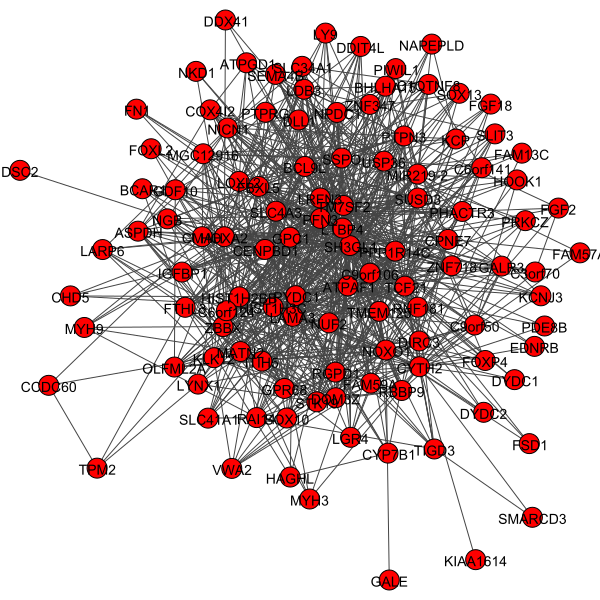

In [291]:
layout = g_small.layout("kk")
igraph.plot(g_small, layout = layout)

In [277]:
res = 0
for i in range(m_mongoloids_sum.shape[0]):
    res += m_mongoloids_sum[i, i]
    
print res    

15024


In [ ]:
print m_siblings_sum[id1, id2], m_mongoloids_sum[id1, id2]